# CARREGANDO A BASE DE DADOS

Keras vem com uma biblioteca chamada conjuntos de dados, que pode utilizar para carregar conjuntos de dados fora da caixa: descarrega os dados do servidor e acelera o processo uma vez que já não tem de descarregar os dados para o seu computador. O comboio e as imagens de teste juntamente com as etiquetas são carregados e armazenados em variáveis train_X, train_Y, test_X, test_Y, respectivamente.

In [1]:
from keras.datasets import mnist # dataset
(train_X,train_Y), (test_X,test_Y) = mnist.load_data()

# ANALISANDO O DATASET

In [2]:
import numpy as np
import tensorflow
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


A partir dos resultados acima referidos, pode-se ver que os dados de formação têm uma forma de 60000 x 28 x 28, uma vez que existem 60.000 amostras de formação de cada uma das dimensões 28 x 28. Da mesma forma, os dados de teste têm uma forma de 10000 x 28 x 28, uma vez que existem 10.000 amostras de teste.

In [3]:
# Encontrar os números únicos das etiquetas dos comboios
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


aqui está também um total de dez classes de saída que vão de 0 a 9.

Text(0.5, 1.0, 'Ground Truth : 7')

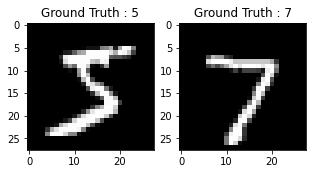

In [4]:
plt.figure(figsize=[5,5])

# Mostrar a primeira imagem nos dados de formação
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Mostrar a primeira imagem nos dados de teste
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

A saída de duas parcelas acima parece uma bota de tornozelo, e a esta classe é atribuída uma etiqueta de classe de 9. Da mesma forma, outros produtos de moda terão etiquetas diferentes, mas produtos semelhantes terão as mesmas etiquetas. Isto significa que todas as imagens da bota de 7.000 tornozelos terão uma etiqueta de classe de 9.

In [5]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

# PROCESSANDO OS DADOS

O gráfico acima, as imagens são imagens em escala de cinzentos com valores de píxeis que variam entre 0 e 255. Além disso, estas imagens têm uma dimensão de 28 x 28. Como resultado, terá de pré-processar os dados antes de os alimentar com o modelo.

Como primeiro passo, converter cada imagem 28 x 28 do comboio e conjunto de teste numa matriz de tamanho 28 x 28 x 1 que é alimentada na rede.

In [6]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

Os dados neste momento estão num formato int8, por isso antes de os alimentar na rede é necessário converter o seu tipo para float32, e também é necessário anular os valores de píxeis no intervalo 0 - 1 inclusive.

Na codificação de uma só vez, converte-se os dados categóricos num vector de números. A razão pela qual se convertem os dados categóricos numa codificação a quente é que os algoritmos de aprendizagem de máquinas não podem trabalhar diretamente com dados categóricos. É gerada uma coluna booleana para cada categoria ou classe. Apenas uma destas colunas poderia assumir o valor 1 para cada amostra. Daí, o termo codificação a quente.

Para a sua declaração de problema, a única codificação quente será um vector de linha, e para cada imagem, terá uma dimensão de 1 x 10. O importante a notar aqui é que o vector consiste em todos os zeros exceto para a classe que representa, e para isso, é 1. Por exemplo, a imagem da bota de tornozelo que traçou acima tem uma etiqueta de 9, portanto para todas as imagens da bota de tornozelo, o único vector de codificação a quente seria [0 0 0 0 0 0 0 0 0 1 0].

In [8]:
# Alterar os rótulos de codificação categórica para codificação de uma só vez
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Mostrar a mudança para etiqueta de categoria usando codificação de uma só vez
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 5
After conversion to one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# DIVISÃO DE TREINO E TESTE

Este último passo é crucial. Na aprendizagem da máquina ou em qualquer tarefa específica de dados, deve particionar os dados corretamente. Para que o modelo possa generalizar bem, divide-se os dados de formação em duas partes, uma concebida para formação e outra para validação. Neste caso, irá treinar o modelo em 80\% dos dados de formação e validá-lo em 20\% dos restantes dados de formação. Isto também ajudará a reduzir o sobre ajuste, uma vez que estará a validar o modelo sobre os dados que não teria visto na fase de formação, o que ajudará a aumentar o desempenho do teste

In [9]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

As imagens são de tamanho 28 x 28. Converte-se a matriz da imagem para uma matriz, redimensiona-se entre 0 e 1, reformula-se para que tenha o tamanho 28 x 28 x 1, e alimenta-se esta como uma entrada para a rede.

Utilizará três camadas convolutivas:

A primeira camada terá 32-3 x 3 filtros,
A segunda camada terá 64-3 x 3 filtros e
A terceira camada terá 128-3 x 3 filtros.
Além disso, existem três camadas de tamanho 2 x 2, cada uma das quais com um máximo de 2 x 2.

# MODELANDO OS DADOS

In [10]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
# from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [11]:
batch_size = 64
epochs = 20
num_classes = 10

# ARQUITETURA DA REDE NEURAL

Em Keras, pode simplesmente empilhar camadas adicionando a camada desejada uma a uma. É exatamente isso que fará aqui: primeiro adicionará uma primeira camada convolucional com Conv2D(). Note que utiliza esta função porque está a trabalhar com imagens! A seguir, adiciona a função de ativação Leaky ReLU que ajuda a rede a aprender limites de decisão não lineares. Uma vez que tem dez classes diferentes, necessitará de um limite de decisão não linear que possa separar estas dez classes que não são separáveis linearmente.

Mais especificamente, adicionam-se as ReLUs Leaky porque elas tentam resolver o problema de unidades lineares retificadas (ReLUs) moribundas. A função de ativação das ReLU é muito utilizada em arquiteturas de redes neurais e mais especificamente em redes convolucionais, onde provou ser mais eficaz do que a função sigmoide logística amplamente utilizada. A partir de 2017, esta função de ativação é a mais popular para redes neuronais profundas. A função ReLU permite a ativação a zero. Contudo, durante a formação, as unidades ReLU podem "morrer". Isto pode acontecer quando um grande gradiente flui através de um neurónio ReLU: pode fazer com que os pesos sejam actualizados de tal forma que o neurónio nunca mais será ativado em nenhum ponto de dados. Se isto acontecer, então o gradiente que flui através da unidade será para sempre zero a partir desse ponto. Os ReLUs com fugas tentam resolver isto: a função não será zero, mas terá um pequeno declive negativo.

A seguir, será adicionada a camada de max-pooling com MaxPooling2D() e assim por diante. A última camada é uma camada Densa que tem uma função de ativação softmax com 10 unidades, que é necessária para este problema de classificação multiclasse.

In [12]:
mnist_model = Sequential()
mnist_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
mnist_model.add(LeakyReLU(alpha=0.1))
mnist_model.add(MaxPooling2D((2, 2),padding='same'))
mnist_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
mnist_model.add(LeakyReLU(alpha=0.1))
mnist_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
mnist_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
mnist_model.add(LeakyReLU(alpha=0.1))                  
mnist_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
mnist_model.add(Flatten())
mnist_model.add(Dense(128, activation='linear'))
mnist_model.add(LeakyReLU(alpha=0.1))                  
mnist_model.add(Dense(num_classes, activation='softmax'))

# COMPILANDO O MODELO

Após a criação do modelo, compilamo-lo utilizando o Adam optimizer, um dos mais populares algoritmos de optimização. Pode ler mais sobre este otimizado aqui. Além disso, especifica o tipo de perda que é a entropia cruzada categórica que é utilizada para classificação multiclasse, pode também utilizar a centralidade cruzada binária como função de perda. Finalmente, especifica-se a métrica como a precisão que se pretende analisar enquanto o modelo está a treinar.

In [13]:
mnist_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(),metrics=['accuracy'])

Visualizando as camadas que criou no passo acima, utilizando a função de resumo. Isto mostrará alguns parâmetros (pesos e enviesamentos) em cada camada e também os parâmetros totais no seu modelo.

In [14]:
mnist_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

# TREINANDO O MODELO

O modelo treina durante 20 épocas. A função fit() devolverá um objecto de história; ao contar o resultado desta função no fashion_train, pode utilizá-la mais tarde para traçar os gráficos da função de precisão e perda entre o treino e a validação, o que o ajudará a analisar visualmente o desempenho do seu modelo.

In [72]:
mnist_model = mnist_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))


Epoch 1/20
750/750 [==============================] - 55s 72ms/step - loss: 0.1610 - accuracy: 0.9486 - val_loss: 0.0550 - val_accuracy: 0.9842
Epoch 2/20
750/750 [==============================] - 61s 81ms/step - loss: 0.0457 - accuracy: 0.9861 - val_loss: 0.0392 - val_accuracy: 0.9883
Epoch 3/20
750/750 [==============================] - 62s 82ms/step - loss: 0.0306 - accuracy: 0.9908 - val_loss: 0.0441 - val_accuracy: 0.9869
Epoch 4/20
750/750 [==============================] - 65s 86ms/step - loss: 0.0234 - accuracy: 0.9925 - val_loss: 0.0289 - val_accuracy: 0.9919
Epoch 5/20
750/750 [==============================] - 64s 86ms/step - loss: 0.0160 - accuracy: 0.9946 - val_loss: 0.0478 - val_accuracy: 0.9864
Epoch 6/20
750/750 [==============================] - 66s 89ms/step - loss: 0.0135 - accuracy: 0.9957 - val_loss: 0.0386 - val_accuracy: 0.9899
Epoch 7/20
750/750 [==============================] - 78s 105ms/step - loss: 0.0131 - accuracy: 0.9956 - val_loss: 0.0337 - val_accuracy

Treinado o modelo em moda-MNIST durante 20 épocas, e observando a precisão e perda do treino, pode dizer-se que o modelo fez um bom trabalho uma vez que após 20 épocas a precisão do treino é de 99% e a perda do treino é bastante baixa.

No entanto, parece que o modelo está em excesso, pois a perda de validação é de 0,4396 e a precisão de validação é de 92%. O sobreajustamento dá uma intuição de que a rede memorizou muito bem os dados de formação, mas não é garantido que funcione com dados invisíveis, e é por isso que existe uma diferença na precisão da formação e validação.

Provavelmente, é necessário lidar com isto. Nas secções seguintes, aprenderá como pode fazer com que o seu modelo tenha um desempenho muito melhor, adicionando uma camada Dropout à rede e mantendo todas as outras camadas inalteradas.

In [81]:
test_eval = mnist_model.model.evaluate(test_X, test_Y_one_hot, verbose=0)

In [82]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.04465256258845329
Test accuracy: 0.991100013256073


# PLOTANDO O GRÁFICO

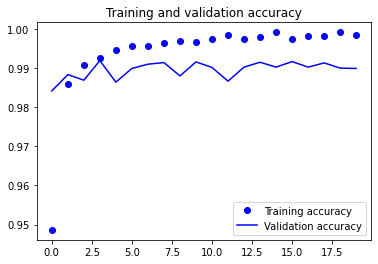

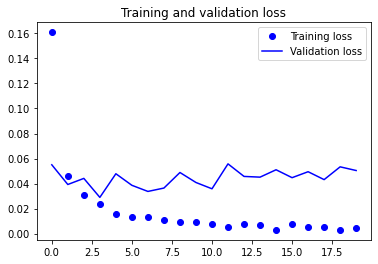

In [87]:
accuracy = mnist_model.history['accuracy']
val_accuracy = mnist_model.history['val_accuracy']
loss = mnist_model.history['loss']
val_loss = mnist_model.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()